In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split


In [6]:
raw_data_set = pd.read_csv('Credit_Scoring_Data.csv')
raw_data_set_test = pd.read_csv('Credit_Scoring_Data_test.csv')

In [66]:
df_x=pd.DataFrame(data=raw_data_set)
df_x=df_x.drop(df_x.columns[[0,1,2,3,4,5,6,7,8,9,18,19,20,21,22,23,24,25,26,27,28,29]],axis=1)
df_x=df_x.drop(df_x.columns[[7]],axis=1)
df_x=df_x.drop(df_x.index[[0]],axis=0)
df_y=df_x.Y
df_y=[int(i) for i in df_y]
df_x=df_x.drop(df_x.columns[[6]],axis=1)
lin_reg=linear_model.LinearRegression()
lin_reg.fit(df_x,df_y)
log_reg=linear_model.LogisticRegression().fit(df_x, df_y)

In [73]:
df_x_test=pd.DataFrame(data=raw_data_set_test)
df_x_test=df_x_test.drop(df_x_test.columns[[0,8,9,10,11,12,13,14,15,16,17,18,19,20]],axis=1)
df_x_test=df_x_test.drop(df_x_test.index[[0]],axis=0)
df_y_test=df_x_test.Y
df_y_test=[int(i) for i in df_y_test]
df_x_test=df_x_test.drop(df_x_test.columns[[6]],axis=1)
linear_prediction=lin_reg.predict(df_x)
logistic_prediction=log_reg.predict(df_x_test)

In [74]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
fpr, tpr, _ = metrics.roc_curve(df_y_test,logistic_prediction)

In [76]:
auc_of_model=metrics.auc(fpr,tpr)

In [77]:
print(auc_of_model)

0.713333333333


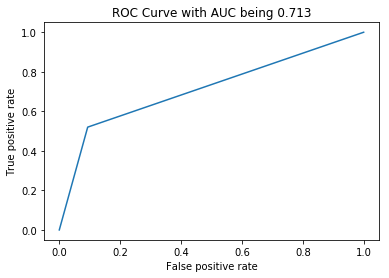

In [78]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve with area %0.2f" %auc_of_model)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve with AUC being %0.3f" %auc_of_model)